# 2018 NBA Trade Deadline Effect on Cavalier Players

![Cavaliers Image](../Resources/Images/WadeInTheWater.jpg)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 


In [16]:
cavPlayer_names = ["Lebron James","Kevin Love","Tristian Thompson","J.R. Smith"]
fieldsOfInterest = ["FG","3P%","AST","PTS","+/-"]
cavPlayer_data = {}
cavPath = "../Data/CavaliersPlayers2018-RawData-031118.xlsx"
for i,cav in enumerate(cavPlayer_names):
    df = pd.read_excel(cavPath,i)
    
    col = list(df.columns)
    col[5] = "Location"
    col[7] = "Point Margin"
    
    df.columns = col
    df["Outcome"] = df["Point Margin"].transform(lambda x: x[:2])
    df["Point Margin"] = df["Point Margin"].transform(lambda x: x[2:])
    
    contV_colCount= 23
    
    df["Location"] = df["Location"].transform(lambda x: "Away" if x is "@" else "Home" )
    
    df["G"] = df["G"].transform(lambda x: x if type(x) is type(1.0) else 0 )
    
    for i in range(contV_colCount):
        df.iloc[:,7+i] = df.iloc[:,7+i].transform(lambda x: 0 if (x== "Did Not Play" or x == "Inactive" or x == "Did Not Dress") else x)
    
    df.drop("Rk",axis = 'columns',inplace = True)
    cavPlayer_data[cav] = df

In [17]:
cavPlayer_data["Lebron James"].head()

,G,Date,Age,Tm,Location,Opp,Point Margin,GS,MP,FG,...,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,Player,Outcome
0,0,2017-10-17,32-291,CLE,Home,BOS,(+3),1,1900-01-01 17:12:00,12,...,9,0,2,4,3,29,28.2,2.0,Lebron James,W
1,0,2017-10-20,32-294,CLE,Away,MIL,(+19),1,1900-01-01 13:25:00,10,...,8,1,1,5,1,24,20.6,13.0,Lebron James,W
2,0,2017-10-21,32-295,CLE,Home,ORL,(-21),1,1900-01-01 07:12:00,8,...,2,1,1,1,0,22,17.6,-31.0,Lebron James,L
3,0,2017-10-24,32-298,CLE,Home,CHI,(+7),1,1900-01-01 13:15:00,13,...,13,3,0,2,1,34,35.1,7.0,Lebron James,W
4,0,2017-10-25,32-299,CLE,Away,BRK,(-5),1,1900-01-01 17:22:00,12,...,13,0,4,8,1,29,25.1,-2.0,Lebron James,L


In [18]:
# reference variables for cavalier_df
trisTom_data = cavPlayer_data["Tristian Thompson"]
lebJames_data = cavPlayer_data["Lebron James"]
kevLove_data = cavPlayer_data["Kevin Love"]
jrSmith_data = cavPlayer_data["J.R. Smith"]

In [66]:
#Creating Five Number Summary function for dataframes. 
## Result: list of available metrics for continous/discrete columns
#####(I am sure there is a simplier method)
def fiveNumSum(df):
    description = df.describe()
    mean = description.loc["mean",:]
    std = description.loc["std"]
    lower_q = description.loc["25%"]
    median = description.loc["50%"]
    upper_q = description.loc["75%"]
    return(mean, std, lower_q, median, upper_q)


,Lower_Q,Mean,Median,Std,Upper_Q
Lebron James,22.0,26.923077,26.0,7.626655,32.0
Kevin Love,0.5,13.822581,16.0,10.576070,21.0
Tristian Thompson,0.0,4.258065,3.5,4.303774,8.0
J.R. Smith,3.0,8.169231,7.0,5.827117,12.0


In [ ]:
#5 Number Summary Dataframes per major metric #"FG","3P%","AST","PTS","+/-"]
trisTom_FiveNum = fiveNumSum(trisTom_data)
lebJames_FiveNum = fiveNumSum(lebJames_data)
kevLove_FiveNum = fiveNumSum(kevLove_data)
jrSmith_FiveNum = fiveNumSum(jrSmith_data)

fiveNum = [lebJames_FiveNum,kevLove_FiveNum,trisTom_FiveNum,jrSmith_FiveNum]
box_dict = {"Mean":[],"Std":[],"Lower_Q":[],"Median":[],"Upper_Q":[]}

fields_dfs = {fieldsOfInterest[0]:0,fieldsOfInterest[1]:0,fieldsOfInterest[2]:0, \
              fieldsOfInterest[3]:0,fieldsOfInterest[4]:0}
for f in fieldsOfInterest:
    for summary in fiveNum:
        box_dict["Mean"].append(summary[0][f])
        box_dict["Std"].append(summary[1][f])                                                          
        box_dict["Lower_Q"].append(summary[2][f])
        box_dict["Median"].append(summary[3][f])
        box_dict["Upper_Q"].append(summary[4][f])
        d = pd.DataFrame(box_dict)
    d.index = [cavPlayer_names]
    box_dict = {"Mean":[],"Std":[],"Lower_Q":[],"Median":[],\
                "Upper_Q":[]}  
    fields_dfs[f] = d
fields_dfs["PTS"]

In [10]:
#Boxplot Visualization w/Customizations
def boxplotVizualizations(dataframe, field):
    fig, axarr = plt.subplots(nrows = 4, ncols=1, sharey = True)
    i = 0
    valueComparisons = []
    names = []
    for key,df in dataframe.items():
        names.append(key)
        valueComparisons.append(df["+/-"][np.isfinite(df["+/-"])])
    for key, df in dataframe.items():
        viz = axarr[i].boxplot(x=valueComparisons, labels=names,showmeans=True)
        
        i += 1 
        plt.setp(viz['medians'], color='red')
    
    fig.set_figheight(14)
    fig.set_figwidth(11)
    plt.tight_layout()
    try:
        plt.savefig(f"../Resources/Images/NBAPlayers-{field}Boxplot.png")
        plt.show()
    except FileNotFoundError:
        plt.savefig(f"../Resources/Images/NBAPlayers-plusMin-Boxplot.png")
    plt.show()

#"FG","3P%","AST","PTS","+/-"]

In [274]:
#Plot distributions of certain critical variables to determine if normal
##Explain reasons of not being normal

#Boxplot summaries comparing variables between players. These visualizations should have the same y scale


# How to determine effect of NBA trade?
## Observe statistics before NBA trade deadline
####then after

## Get same sets of data, and do A/B testing?


###Make a boxplot summary with several rowss representing players. Then have each dataframe represent a certain stat.
########Associate this with its respective boxplot

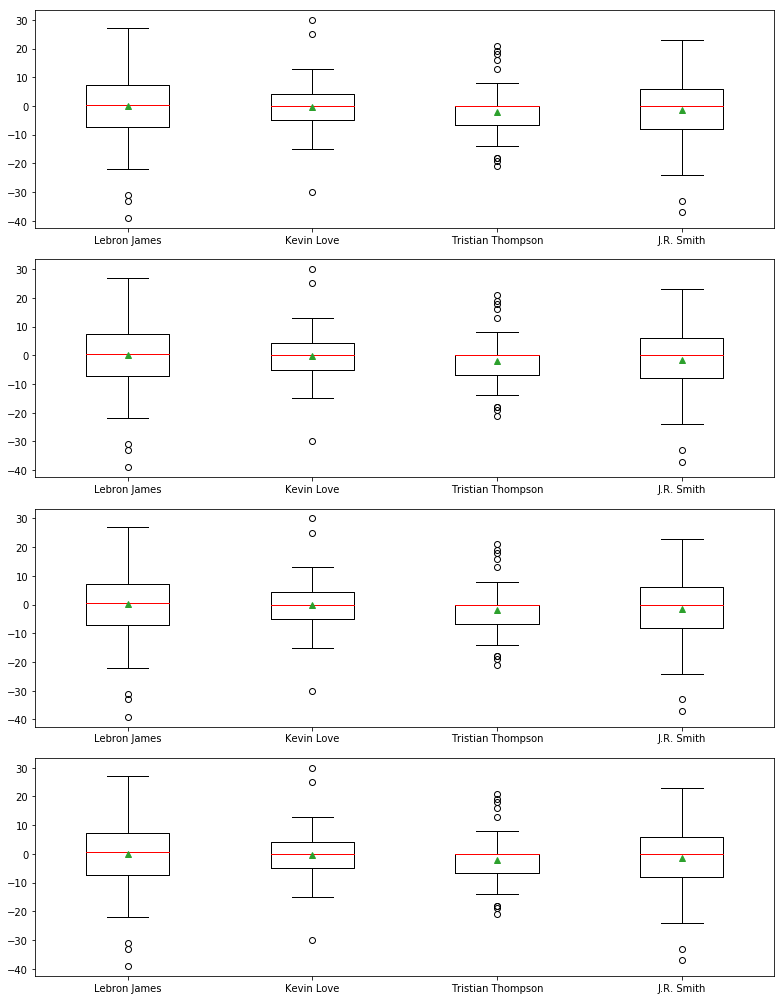

In [11]:
boxplotVizualizations(cavPlayer_data,"FG")

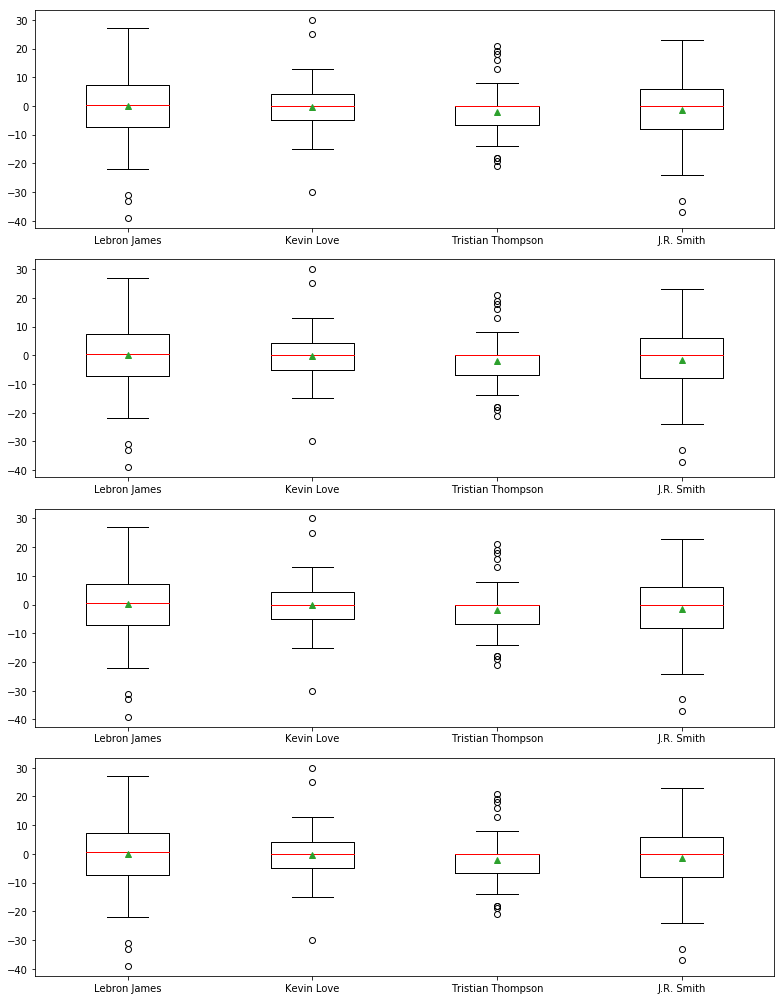

In [12]:
boxplotVizualizations(cavPlayer_data,"3P%")

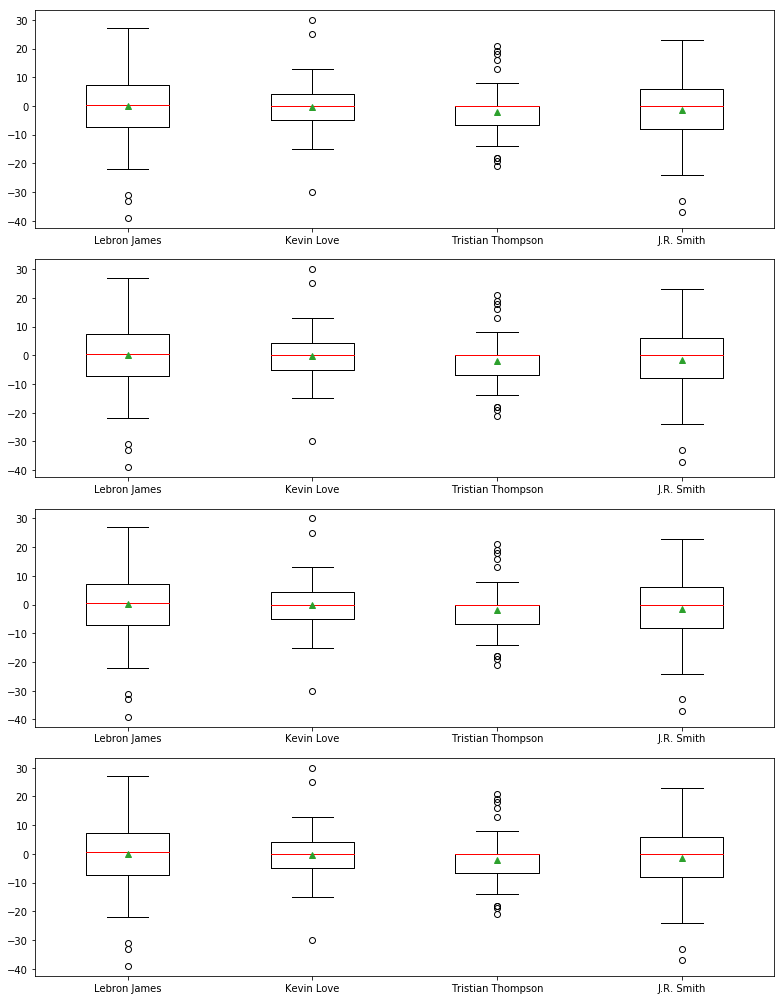

In [13]:
boxplotVizualizations(cavPlayer_data,"AST")

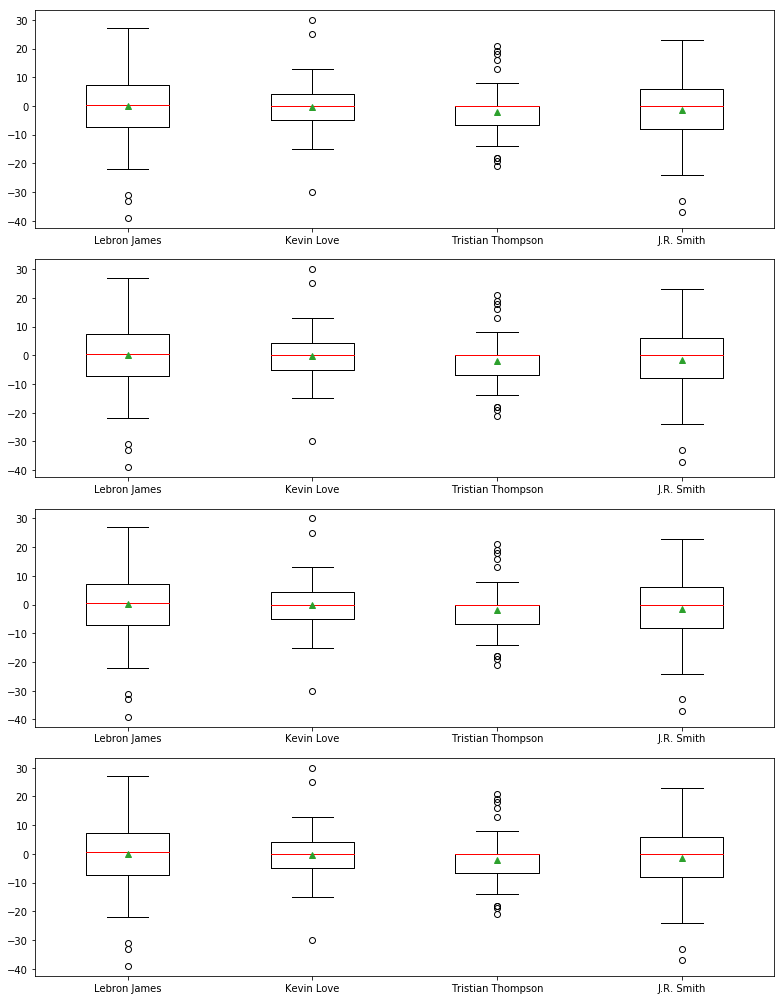

In [14]:
boxplotVizualizations(cavPlayer_data,"PTS")

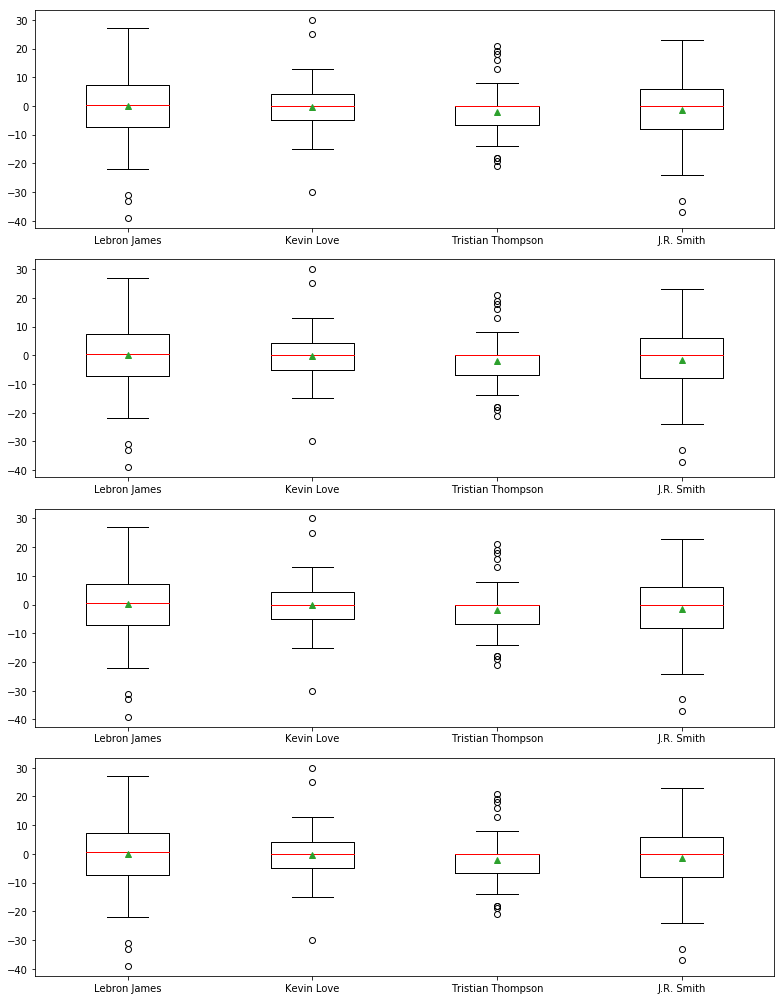

In [15]:
boxplotVizualizations(cavPlayer_data,"+/-")

In [275]:
def scatterTimeline(dataframe,field):
    fig, axarr = plt.subplots(nrows = 4, ncols =1 , sharey = True)
    i = 0
    for key, vals in dataframe.items():
        #Scatterplot
        max_val = max(dataframe["Lebron James"][field])
        min_val = min(dataframe["Lebron James"][field])
        
        axarr[i].plot(vals["Date"],vals[field],"black" ,linewidth = 4)
        
        if min_val<0.0 and max_val<=1.0:
            axarr[i].vlines("2018-02-08",min_val,1, "r", "dotted",label = "Trade Deadline")
        elif min_val<0.0 and max_val>1.0:
            axarr[i].vlines("2018-02-08",min_val,max_val, "r", "dotted",label = "Trade Deadline")
        
        elif min_val>=0.0 and max_val>1.0:
            axarr[i].vlines("2018-02-08",0,max_val, "r", "dotted",label = "Trade Deadline")
            
        else:
            axarr[i].vlines("2018-02-08",min_val,1, "r", "dotted",label = "Trade Deadline")

        axarr[i].set_title(f"{key}'s 2017-2018 {field} Timeline")
        i +=1
        
    fig.set_figheight(12)
    fig.set_figwidth(10)
    plt.tight_layout()
    try:
        plt.savefig(f"../Resources/Images/NBAPlayers-{field}Scatterplot.png")
        plt.show()
    except FileNotFoundError:
        plt.savefig(f"../Resources/Images/NBAPlayers-plusMin-Scatterplot.png")
        plt.show()

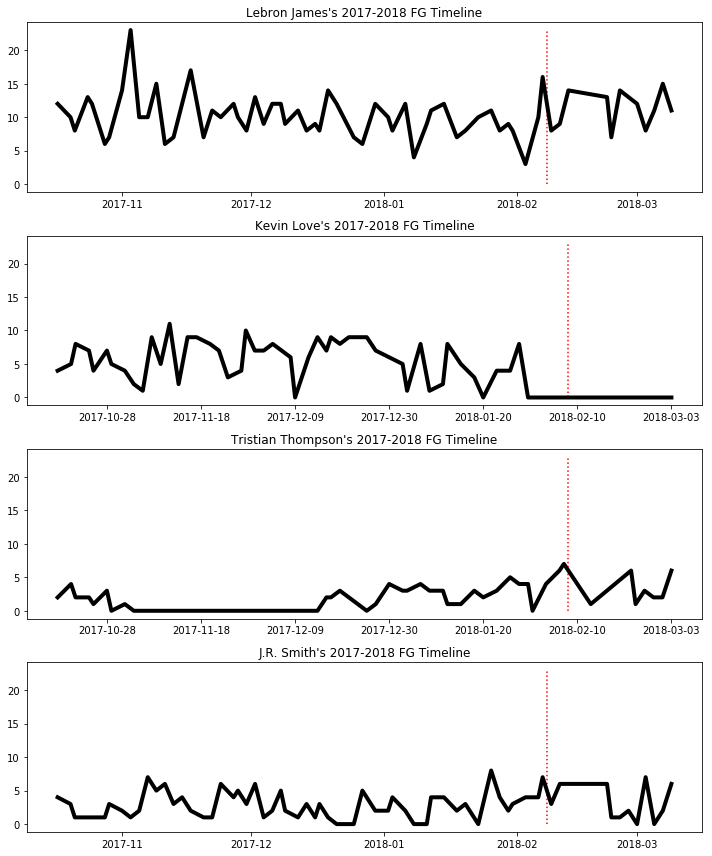

In [276]:
scatterTimeline(cavPlayer_data,"FG")

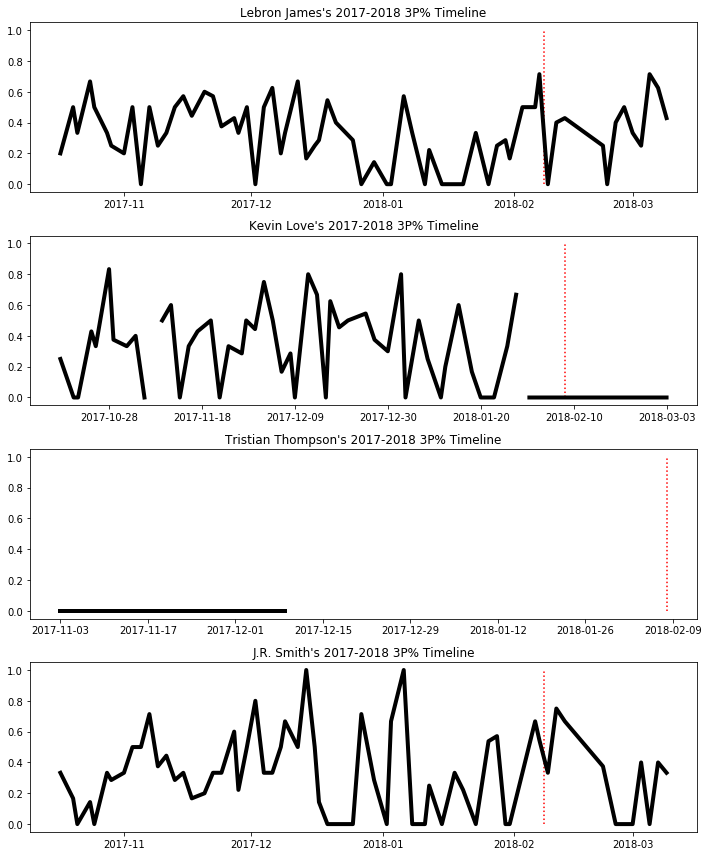

In [277]:
scatterTimeline(cavPlayer_data,"3P%")

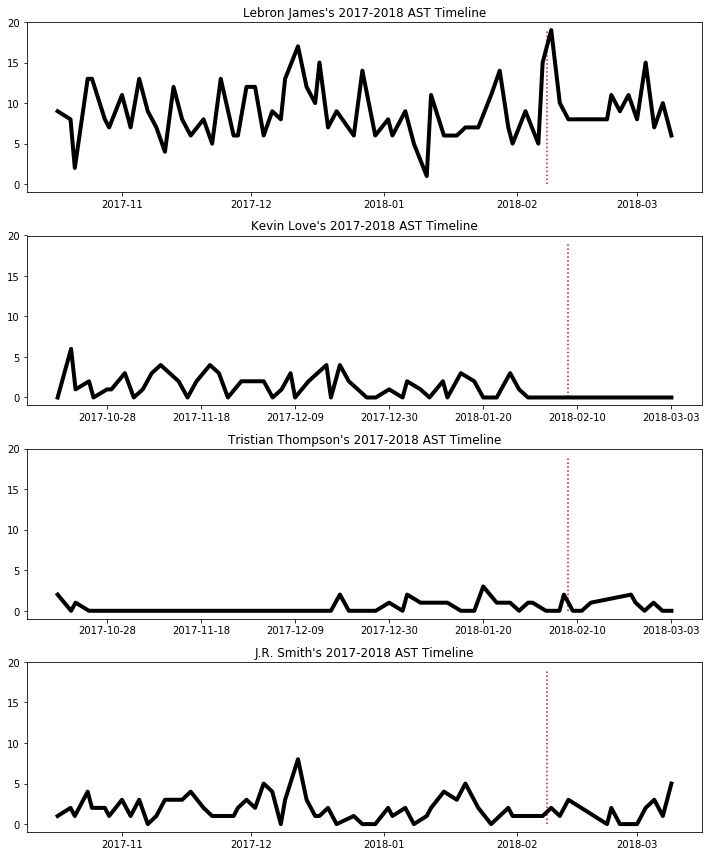

In [278]:
scatterTimeline(cavPlayer_data,"AST")

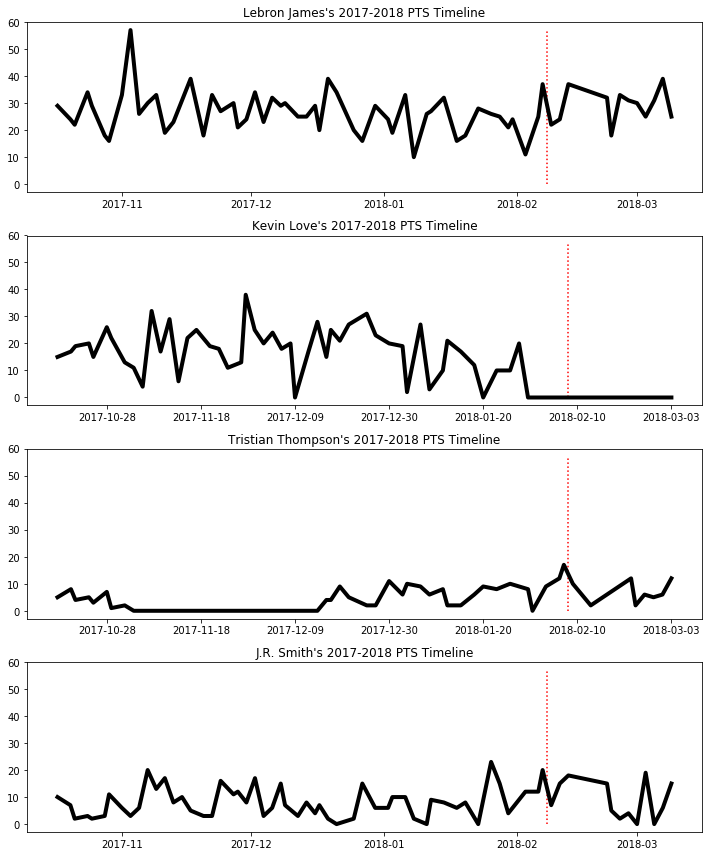

In [279]:
scatterTimeline(cavPlayer_data,"PTS")

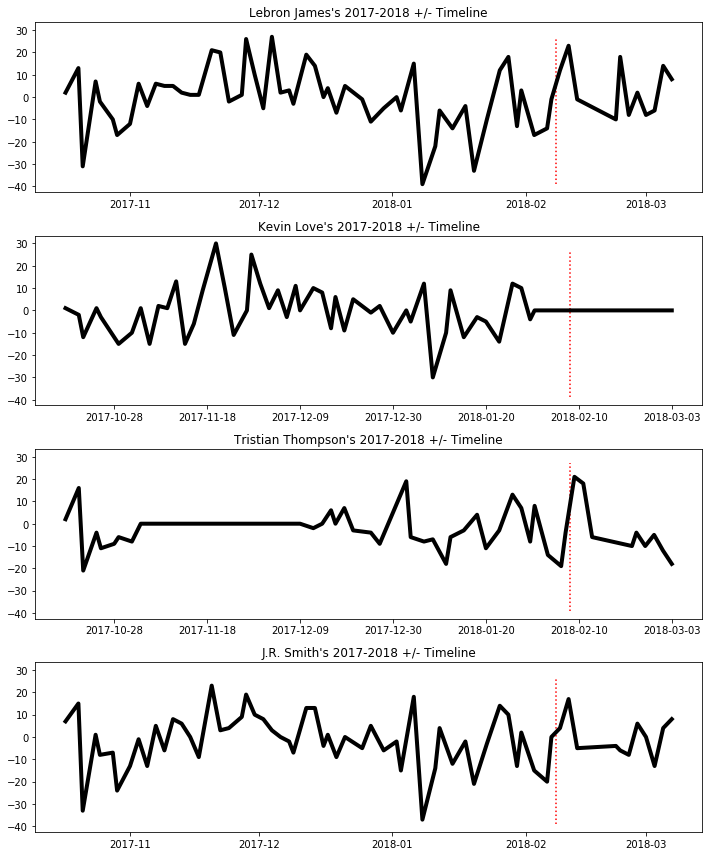

In [280]:
scatterTimeline(cavPlayer_data,"+/-")